In [11]:
import string
import numpy as np
import matplotlib.pyplot as plt

# Spacy
import spacy
nlp = spacy.load('en_core_web_sm')

# Keras
from keras.models import Sequential
from keras.layers import Dense

In [12]:
# Read the data
text = ''
with open('data/royal-family.txt', 'r') as f:
    text = f.read()

print('Number of words: ', len(text.split()))

Number of words:  75


In [13]:
# Initial configurations and properties
window_size = 5 # Must be odd
embedding_dim = 2
stop_words = nlp.Defaults.stop_words

In [14]:

# Function to remove punctuation
def remove_punctutation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Function to remove stop words
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])


# Do a little preprocessing
text = remove_punctutation(text)
text = remove_stopwords(text)
    

In [15]:
# Create vocabulary
words = set(text.split())
vocab = {word: i for i, word in enumerate(words)}


In [16]:
# Create windows
windows = []
words = text.split()

bin = window_size // 2
for i in range(len(words)):    

    # left
    for j in range(i - bin, i):
        if j >= 0:
            windows.append([words[j], words[bin]])

    # right
    for j in range(i + 1, i + bin + 1):
        if j < len(words):
            windows.append([words[bin], words[j]])

In [17]:
# One hot encoding
def one_hot_encoding(token):
    
    token_vector = np.zeros(len(vocab))
    token_vector[vocab[token]] = 1

    return token_vector

X, Y = [], []

for window in windows:

    # Encode
    X_one_hot = one_hot_encoding(window[0])
    Y_one_hot = one_hot_encoding(window[1])

    # Append to corresponding lists
    X.append(X_one_hot)
    Y.append(Y_one_hot)

# Conver to numpy arrays
X = np.array(X)
Y = np.array(Y)

In [18]:
# Build the model
model = Sequential()
model.add(Dense(units = embedding_dim, input_dim = X.shape[1], activation = 'linear'))
model.add(Dense(units = Y.shape[1], activation = 'softmax'))

# Compile the model
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

# Train the model
model.fit(
    X,
    Y,
    epochs = 100,
    batch_size = 256,
    verbose = 0
)

# model.save_weights('embedding_dict.h5')

In [19]:
# Get word embedding vectors
weights = model.get_weights()[0]

# Create Embedding dictionary
embedding_dict = {}
for word in words: 
    embedding_dict.update({word: weights[vocab.get(word)]})

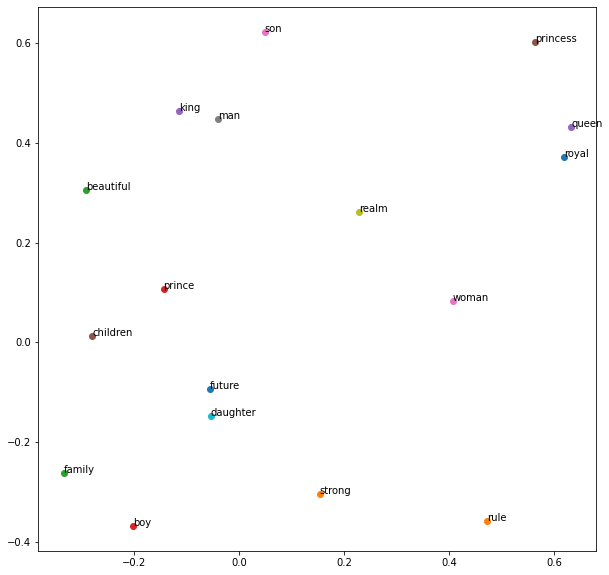

In [20]:
# Plot the model pari-wise
plt.figure(figsize = (10, 10))

for word in list(vocab.keys()):
  coord = embedding_dict.get(word)

  plt.scatter(coord[0], coord[1])
  plt.annotate(word, (coord[0], coord[1]))